# 💰 Restaurant Tips Dataset - Exploratory Data Analysis

### Objective:
To explore tipping behavior in a restaurant setting, identify patterns based on customer attributes like gender, smoking status, time, and day, and uncover meaningful insights from the data.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.style.use("ggplot")

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- The dataset contains 244 rows and 7 columns.
- No missing values.
- 3 numeric variables: `total_bill`, `tip`, `size`
- 4 categorical variables: `sex`, `smoker`, `day`, `time`


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- All columns are clean and usable.
- No missing/null values.


# 📊 Univariate Analysis

### Numeric Columns 

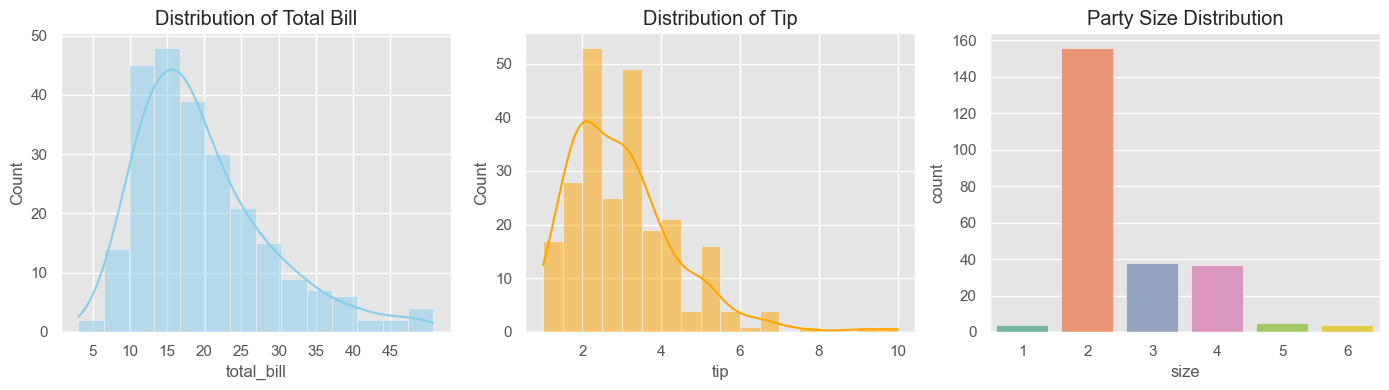

In [4]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['total_bill'], kde=True, color='skyblue')
plt.xticks(np.arange(5,50,5))
plt.title('Distribution of Total Bill')

plt.subplot(1, 3, 2)
sns.histplot(df['tip'], kde=True, color='orange')
plt.title('Distribution of Tip')

plt.subplot(1, 3, 3)
sns.countplot(x='size', data=df, hue='size', palette='Set2', legend=False)
plt.title('Party Size Distribution')

plt.tight_layout()
plt.show()

### Categorical Columns

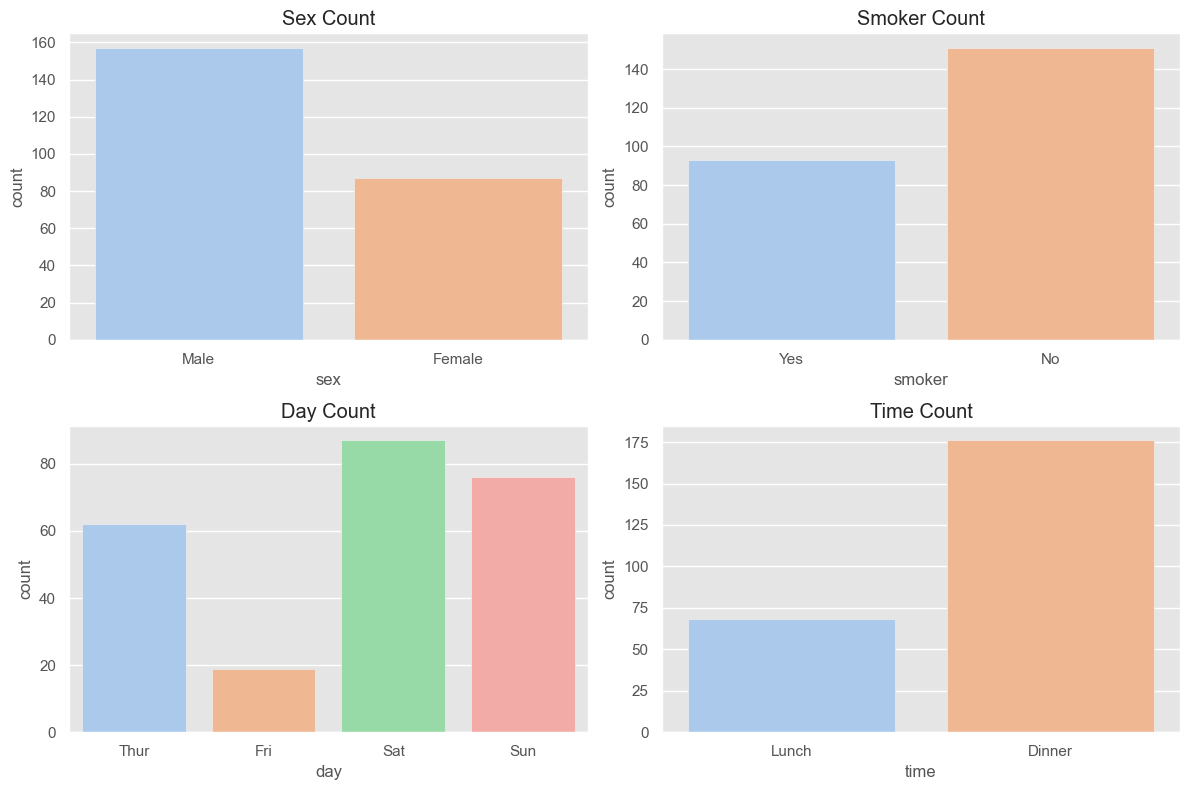

In [5]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(['sex', 'smoker', 'day', 'time']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, hue = col, palette='pastel',legend = False )
    plt.title(f'{col.title()} Count')

plt.tight_layout()
plt.show()

# 📈 Feature Engineering

In [6]:
df['tip_perc'] = (df['tip'] / df['total_bill']) * 100
df['tip_perc'].head()

0     5.944673
1    16.054159
2    16.658734
3    13.978041
4    14.680765
Name: tip_perc, dtype: float64

# 🔄 Bivariate Analysis

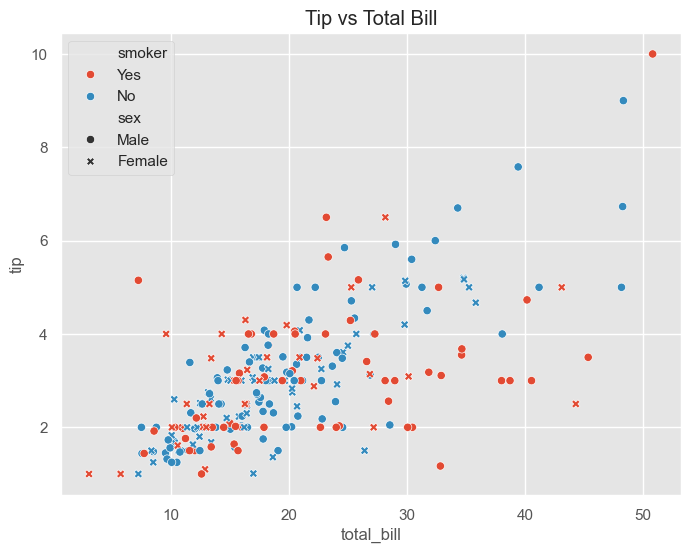

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='smoker', style='sex')
plt.title('Tip vs Total Bill')
plt.savefig("tip_vs_totalBill.png")
plt.show()

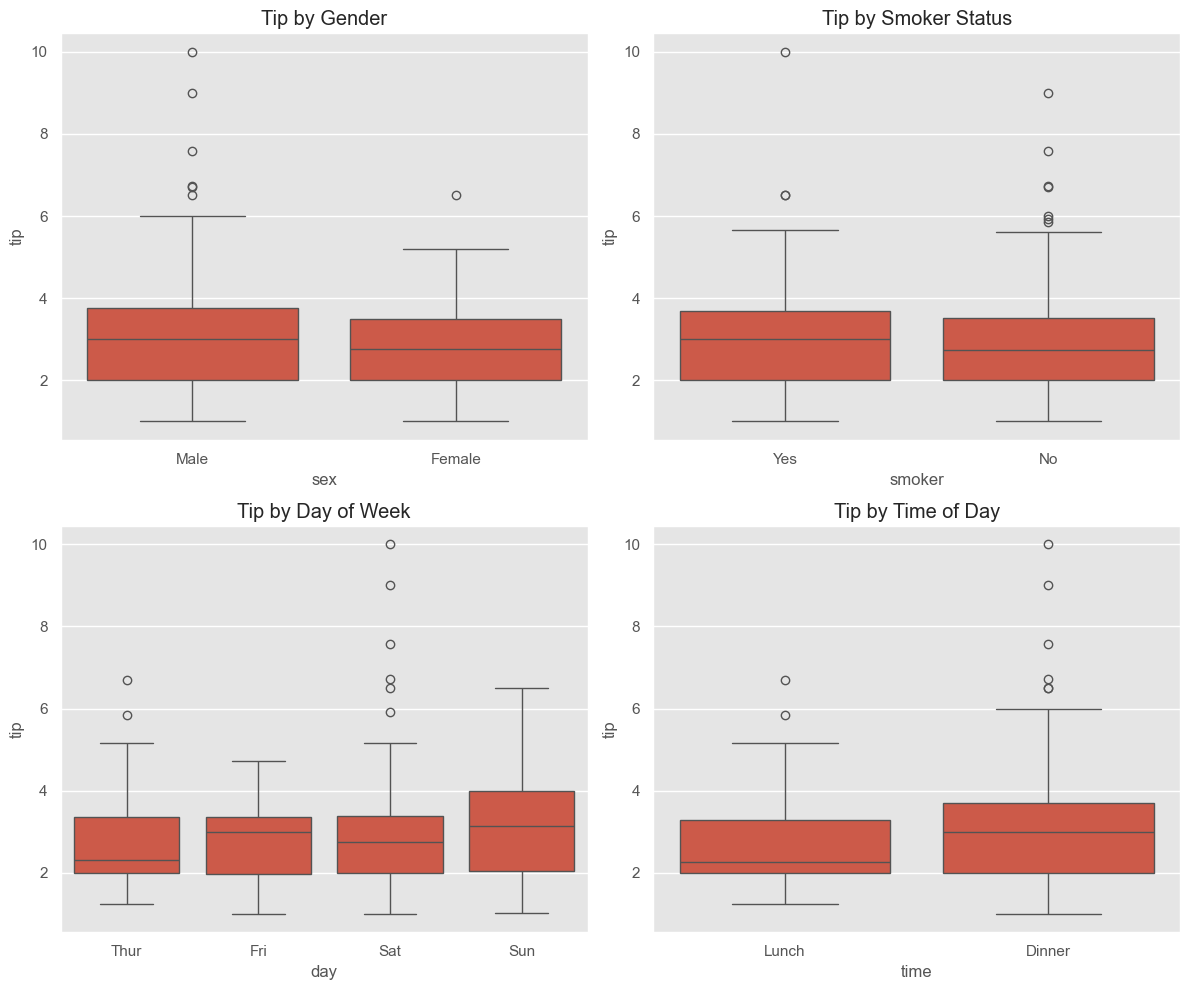

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Creates a 2x2 grid

sns.boxplot(x='sex', y='tip', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Tip by Gender')

sns.boxplot(x='smoker', y='tip', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Tip by Smoker Status')

sns.boxplot(x='day', y='tip', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Tip by Day of Week')

sns.boxplot(x='time', y='tip', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Tip by Time of Day')

plt.tight_layout()
plt.show()

In [9]:
df.groupby(['sex', 'smoker'], observed=True)['tip_perc'].mean().sort_values(ascending=False)

sex     smoker
Female  Yes       18.215035
Male    No        16.066872
Female  No        15.692097
Male    Yes       15.277118
Name: tip_perc, dtype: float64

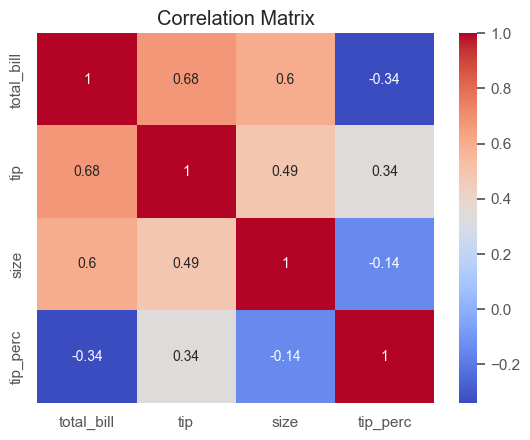

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("correlation_heatmap.png")
plt.show()

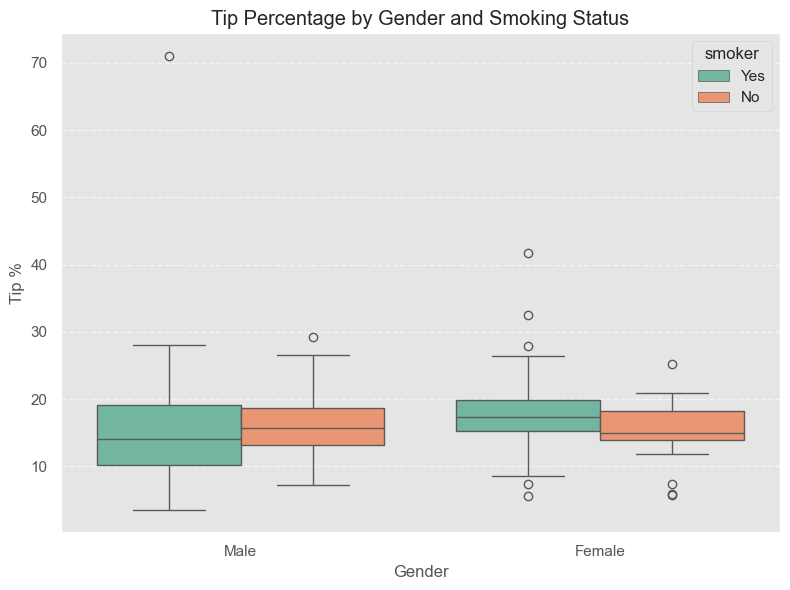

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip_perc', hue='smoker', data=df, palette='Set2')
plt.title('Tip Percentage by Gender and Smoking Status')
plt.ylabel('Tip %')
plt.xlabel('Gender')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("tip_perc_by_gender_and_smoking.png")
plt.show()

# 💡Insights & Takeaways

### Key Takeaways:

- 💁‍♀️ Female smokers gave the highest tips *on average*.
- 🚬 Male smokers had more extreme values (high outliers), but lower average.
- 🍽️ Tips were higher during dinner time and weekends.
- 👥 Most tips were from party sizes of 2.